In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [45]:
df = pd.read_csv(r'./student-por.csv', sep=';')

In [46]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## EDA

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [48]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [49]:
print(df.loc[1])

school             GP
sex                 F
age                17
address             U
famsize           GT3
Pstatus             T
Medu                1
Fedu                1
Mjob          at_home
Fjob            other
reason         course
guardian       father
traveltime          1
studytime           2
failures            0
schoolsup          no
famsup            yes
paid               no
activities         no
nursery            no
higher            yes
internet          yes
romantic           no
famrel              5
freetime            3
goout               3
Dalc                1
Walc                1
health              3
absences            2
G1                  9
G2                 11
G3                 11
Name: 1, dtype: object


In [50]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [51]:
#  Detect duplicates
duplicates = df.duplicated().sum()
print(f"🔹 Duplicate rows: {duplicates}\n")


🔹 Duplicate rows: 0



In [52]:
# Summary statistics
df.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649,649,649.000000,649,649,649,649.000000,649.000000,649,649,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,423,383,NaN,452,457,569,NaN,NaN,258,367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.744222,NaN,NaN,NaN,2.514638,2.306626,NaN,NaN,...,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,NaN,NaN,1.218138,NaN,NaN,NaN,1.134552,1.099931,NaN,NaN,...,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000


## Basic visualizations

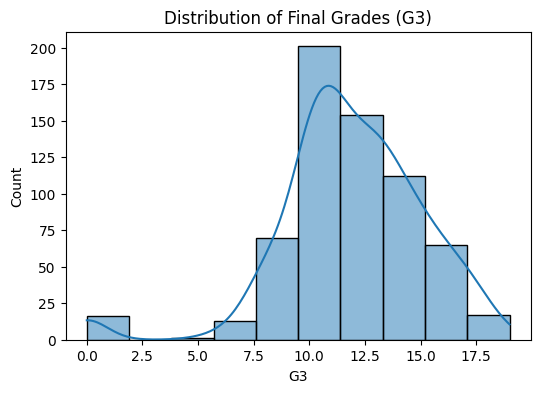

In [53]:

# Convert categorical yes/no to 1/0
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 
               'nursery', 'higher', 'internet', 'romantic']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})


# Distribution of final grades
plt.figure(figsize=(6,4))
sns.histplot(df['G3'], bins=10, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.show()


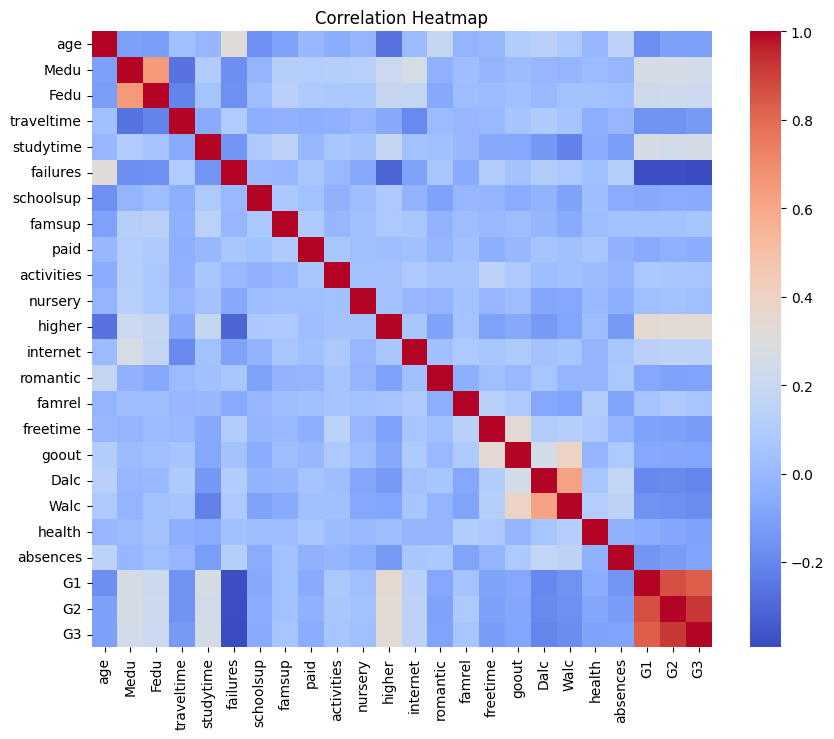

In [54]:
# Correlation heatmap numerical
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [55]:

# Check feature importance correlations with G3
corr_with_g3 = df.corr(numeric_only=True)['G3'].sort_values(ascending=False)
print("🔹 Correlation with Final Grade (G3):")
print(corr_with_g3)

🔹 Correlation with Final Grade (G3):
G3            1.000000
G2            0.918548
G1            0.826387
higher        0.332172
studytime     0.249789
Medu          0.240151
Fedu          0.211800
internet      0.150025
famrel        0.063361
activities    0.059791
famsup        0.059206
nursery       0.028752
paid         -0.054898
schoolsup    -0.066405
goout        -0.087641
romantic     -0.090583
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
failures     -0.393316
Name: G3, dtype: float64


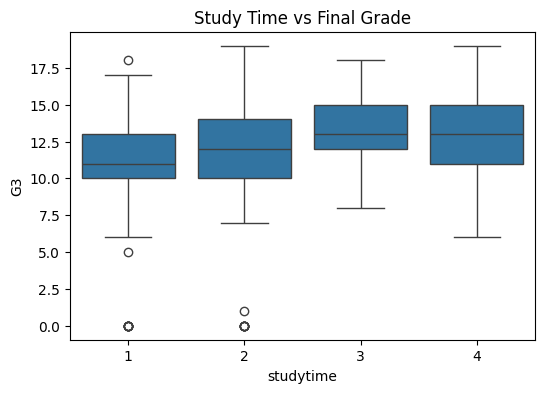

In [56]:

# Relationship between studytime and final grade
plt.figure(figsize=(6,4))
sns.boxplot(x='studytime', y='G3', data=df)
plt.title("Study Time vs Final Grade")
plt.show()


In [57]:

print("Number of students:", len(df))
print("Number of features:", len(df.columns))


Number of students: 649
Number of features: 33


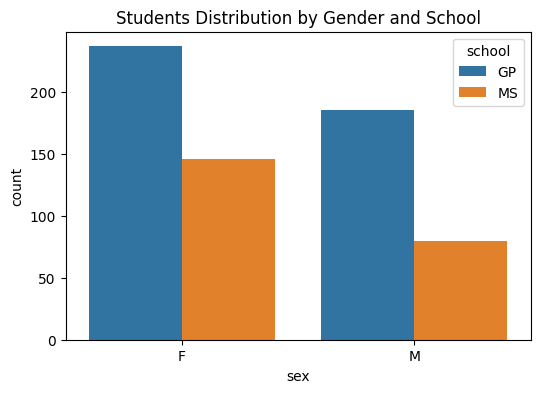

In [58]:
# Distribution by gender and school

plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='school', data=df)
plt.title("Students Distribution by Gender and School")
plt.show()


Average of G1, G2, G3:
G1    11.399076
G2    11.570108
G3    11.906009
dtype: float64


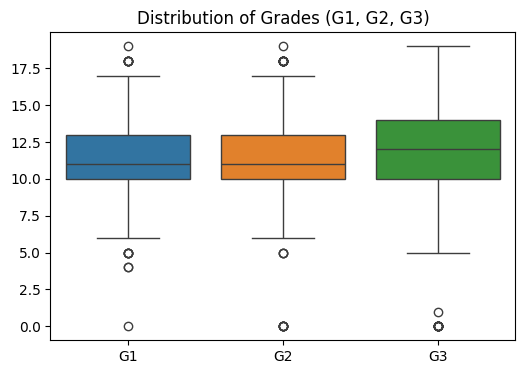

In [59]:

# Average grades (G1, G2, G3)

print("Average of G1, G2, G3:")
print(df[['G1','G2','G3']].mean())

plt.figure(figsize=(6,4))
sns.boxplot(data=df[['G1','G2','G3']])
plt.title("Distribution of Grades (G1, G2, G3)")
plt.show()


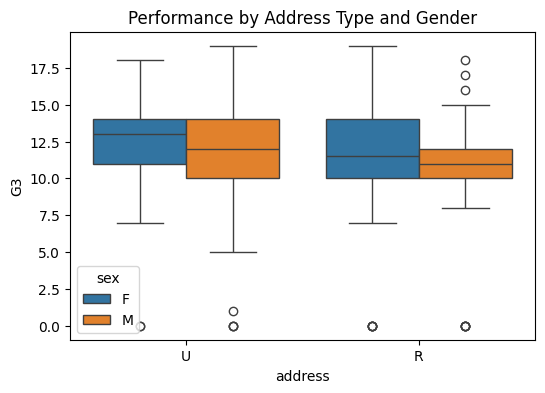

In [60]:
# Compare performance by address (Urban/Rural) and gender

plt.figure(figsize=(6,4))
sns.boxplot(x='address', y='G3', hue='sex', data=df)
plt.title("Performance by Address Type and Gender")
plt.show()

## 🎯 Classification - Predict Performance Level

In [61]:
# Binary columns to numeric
binary_cols = ['schoolsup', 'famsup', 'internet']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Create performance level target
def performance(g3):
    if g3 >= 15:
        return 'Excellent'
    elif g3 >= 10:
        return 'Good'
    else:
        return 'Poor'

df['Performance'] = df['G3'].apply(performance)

# Select features
X = df[['studytime', 'failures', 'absences', 'schoolsup', 'famsup', 'internet', 'health', 'G1', 'G2']]
y = df['Performance']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("🎯 Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


🎯 Classification Report:
              precision    recall  f1-score   support

   Excellent       0.91      0.97      0.94        32
        Good       0.92      0.87      0.89        83
        Poor       0.56      0.67      0.61        15

    accuracy                           0.87       130
   macro avg       0.80      0.83      0.81       130
weighted avg       0.88      0.87      0.87       130

Accuracy: 0.8692307692307693


## 📈 Regression - Predict Final Grade (G3)

In [62]:
# Select features
X = df[['G1', 'G2', 'studytime', 'absences', 'failures', 'Dalc', 'Walc', 'health']]
y = df['G3']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# Evaluation
print("\n📊 Regression Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



📊 Regression Results:
R² Score: 0.8438961677489252
RMSE: 1.2338072114108252


## 🧩 Clustering - Group Students by Study Habits & Behavior



🧩 Cluster Centers (Scaled):
[[ 0.3022148  -0.28754298 -0.32948218 -0.32596863 -0.27053872  0.39500758]
 [-0.53241246  0.50656508  0.58044946  0.57425962  0.47660865 -0.6958857 ]]


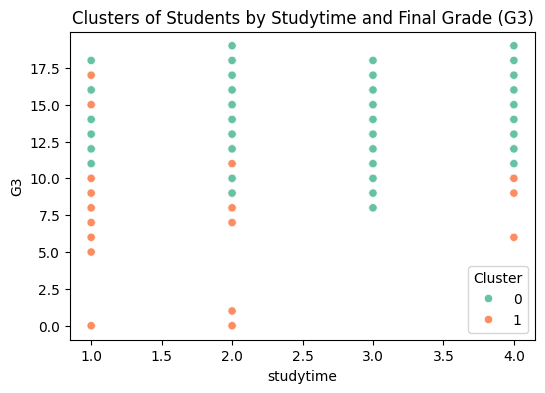


🔹 Cluster Summary:
         studytime  absences  failures     goout  freetime         G3
Cluster                                                              
0         2.181159  2.326087  0.026570  2.801932  2.896135  13.181159
1         1.489362  6.008511  0.565957  3.859574  3.680851   9.659574


In [63]:
# Select features
X = df[['studytime', 'absences', 'failures', 'goout', 'freetime', 'G3']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose number of clusters (k=3)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
print("\n🧩 Cluster Centers (Scaled):")
print(kmeans.cluster_centers_)

# Visualize clusters by G3 and studytime
plt.figure(figsize=(6,4))
sns.scatterplot(x='studytime', y='G3', hue='Cluster', data=df, palette='Set2')
plt.title("Clusters of Students by Studytime and Final Grade (G3)")
plt.show()

# View average values per cluster
print("\n🔹 Cluster Summary:")
print(df.groupby('Cluster')[['studytime','absences','failures','goout','freetime','G3']].mean())


## ⏳ Time Series Analysis - Student Performance Progress

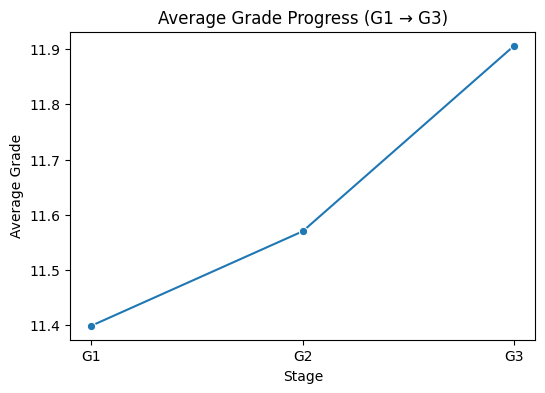

In [64]:

# Calculate average grade for each stage
mean_grades = df[['G1', 'G2', 'G3']].mean()

# Plot average progress
plt.figure(figsize=(6,4))
sns.lineplot(x=['G1','G2','G3'], y=mean_grades.values, marker='o')
plt.title("Average Grade Progress (G1 → G3)")
plt.ylabel("Average Grade")
plt.xlabel("Stage")
plt.show()


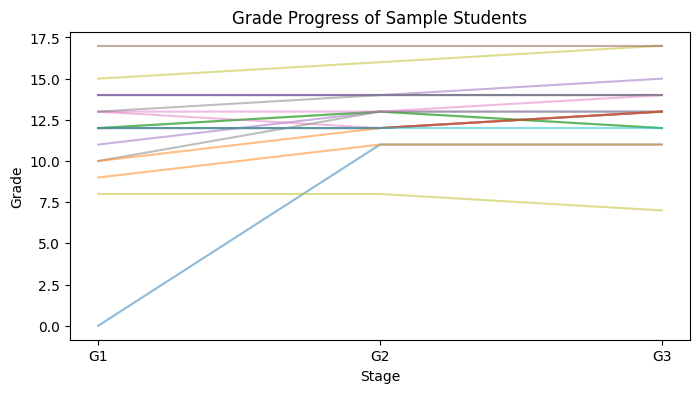

In [65]:

# Plot change per student (optional visualization)
plt.figure(figsize=(8,4))
for i in range(20):  # show first 20 students for clarity
    plt.plot(['G1','G2','G3'], df.loc[i, ['G1','G2','G3']], alpha=0.5)
plt.title("Grade Progress of Sample Students")
plt.ylabel("Grade")
plt.xlabel("Stage")
plt.show()



In [66]:

X = df[['G1', 'G2']]
y = df['G3']

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluation
print("📈 Time Series Regression (G3 ~ G1 + G2):")
print("R² Score:", r2_score(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))


📈 Time Series Regression (G3 ~ G1 + G2):
R² Score: 0.8477615336889918
RMSE: 1.2595578069101419


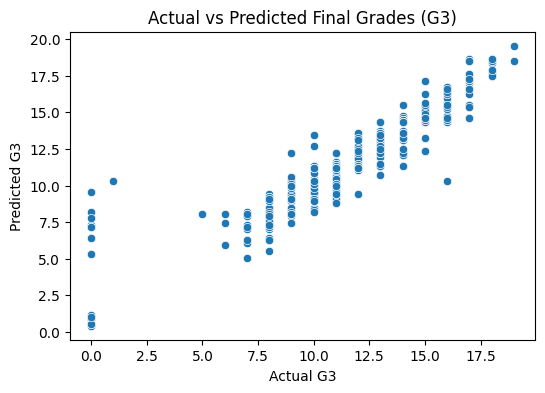

In [67]:

# Compare actual vs predicted
plt.figure(figsize=(6,4))
sns.scatterplot(x=y, y=y_pred)
plt.title("Actual vs Predicted Final Grades (G3)")
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.show()


In [68]:

# Show model coefficients
print("Intercept:", model.intercept_)
print("Coefficients for [G1, G2]:", model.coef_)


Intercept: -0.17128308798693404
Coefficients for [G1, G2]: [0.14889649 0.89714029]
